# Covid-19 Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# loading datasets from https://github.com/datasets/covid-19
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates = ['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [4]:
#creating new column called total cases 
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [5]:
# worldwide cases
worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,555,28,17,600
2020-01-23,654,30,18,702
2020-01-24,941,36,26,1003
2020-01-25,1434,39,42,1515
2020-01-26,2118,52,56,2226


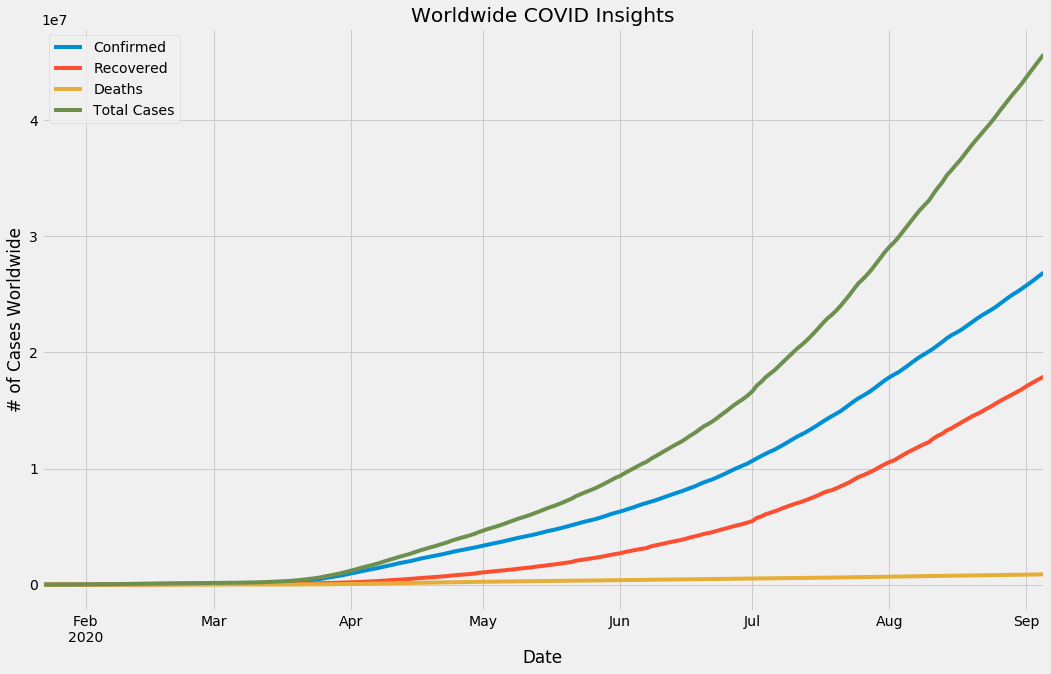

In [6]:
#Ploting the Total cases 

w = worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

# Germany vs. Worldwide Cases

/home/hmd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


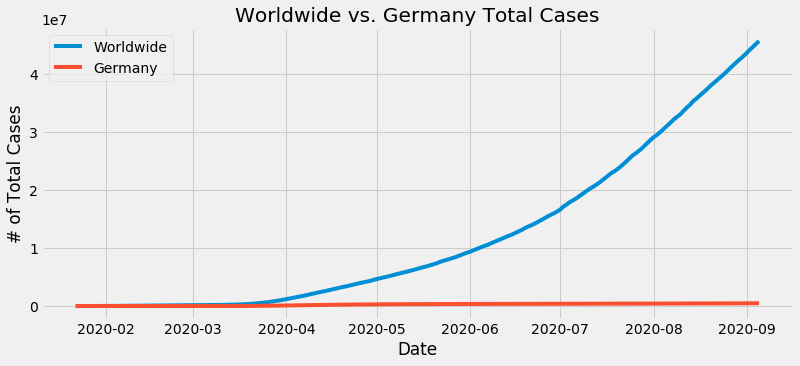

In [7]:
Germany_df = df[df['Country'] == 'Germany'].groupby(['Date']).sum()

# add two line chart to one figure and the way we can do this is with subplot and ploting two seprate line on the axis

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)   #"111" means "1x1 grid, first subplot"

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(Germany_df[['Total Cases']], label='Germany')

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Germany Total Cases')

plt.legend(loc='Upper left')
plt.show()

# Daily Germany Cases and Death

In [8]:
Germany_df = Germany_df.reset_index()
Germany_df

,Date,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
223,2020-09-01,246015,218403,9307,473725
224,2020-09-02,247411,219904,9322,476637
225,2020-09-03,248840,221525,9322,479687
226,2020-09-04,250283,222802,9327,482412


In [9]:
# Creating new Column as Daily confirmed with deaggregating our data
# Pandas dataframe.shift() function Shift index by desired number of periods with an optional time freq. 
#This function takes a scalar parameter called period, which represents the number of shifts to be made over the desired axis. 
#This function is very helpful when dealing with time-series data.

Germany_df['Daily Confirmed'] = Germany_df['Confirmed'].sub(Germany_df['Confirmed'].shift())
Germany_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed
0,2020-01-22,0,0,0,0,NaN
1,2020-01-23,0,0,0,0,0.0
2,2020-01-24,0,0,0,0,0.0
3,2020-01-25,0,0,0,0,0.0
4,2020-01-26,0,0,0,0,0.0
...,...,...,...,...,...,...
223,2020-09-01,246015,218403,9307,473725,1213.0
224,2020-09-02,247411,219904,9322,476637,1396.0
225,2020-09-03,248840,221525,9322,479687,1429.0
226,2020-09-04,250283,222802,9327,482412,1443.0


In [10]:
# Creating new column as Daily Death
Germany_df['Daily Deaths'] = Germany_df['Deaths'].sub(Germany_df['Deaths'].shift())
Germany_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,2020-01-22,0,0,0,0,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0
4,2020-01-26,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
223,2020-09-01,246015,218403,9307,473725,1213.0,4.0
224,2020-09-02,247411,219904,9322,476637,1396.0,15.0
225,2020-09-03,248840,221525,9322,479687,1429.0,0.0
226,2020-09-04,250283,222802,9327,482412,1443.0,5.0


/home/hmd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


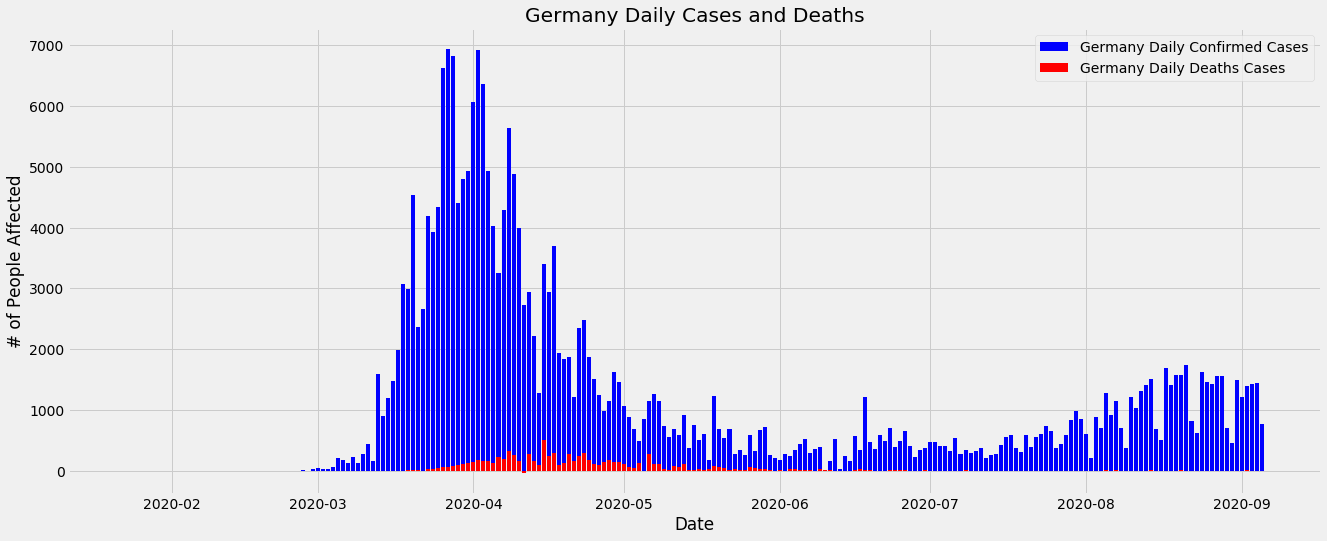

In [11]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.bar(Germany_df['Date'], Germany_df['Daily Confirmed'], color='b', label='Germany Daily Confirmed Cases')
ax.bar(Germany_df['Date'], Germany_df['Daily Deaths'], color='r', label='Germany Daily Deaths Cases')

ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Germany Daily Cases and Deaths')

plt.legend(loc='Upper left')

plt.show()

# Worst Hit Countries by COVID-19

In [22]:
df.nlargest(5)

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [13]:
from datetime import date , timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

'2020-09-05'

In [19]:
today_df = df[df['Date']== yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending = False)[:10]
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases


In [21]:
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
rest-of-world,0.0,0.0,0.0,0.0,0.0,0.0
